# 1. Import Necessary Libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [29]:
#converting into dataframe
df = pd.read_csv('mpg.csv')

In [30]:
df.shape

(398, 9)

In [31]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Imputing Missing Values with Medians

In [33]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
138     1
135     1
116     1
108     1
61      1
Name: horsepower, Length: 94, dtype: int64

In [12]:
df['car name'].value_counts()

ford pinto                 6
amc matador                5
toyota corolla             5
ford maverick              5
amc gremlin                4
                          ..
honda civic (auto)         1
fiat x1.9                  1
toyota corolla liftback    1
chevrolet camaro           1
plymouth horizon miser     1
Name: car name, Length: 305, dtype: int64

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

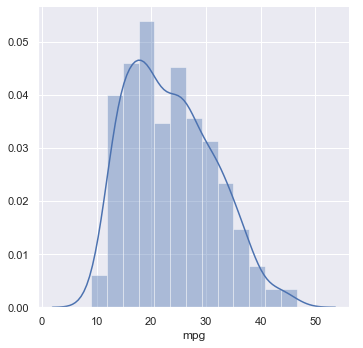

In [15]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'mpg')\
    .add_legend();
plt.show()

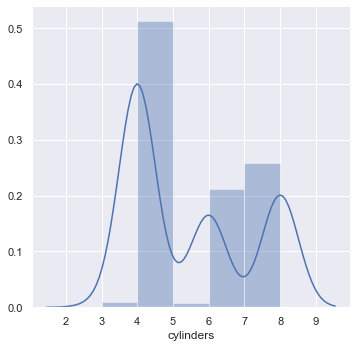

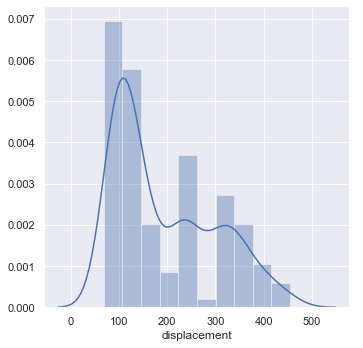

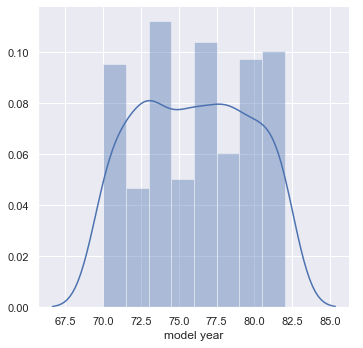

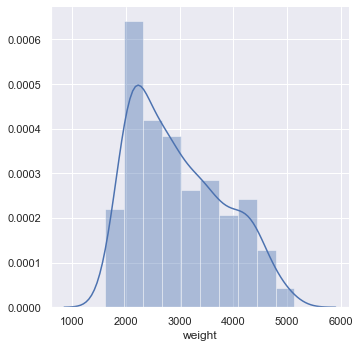

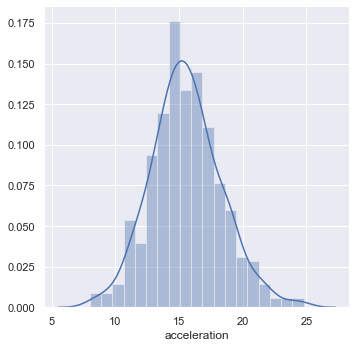

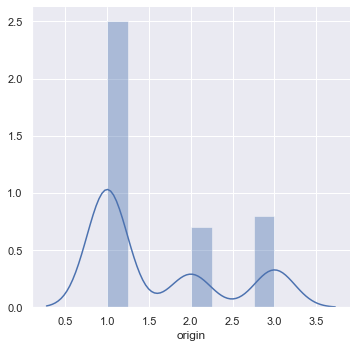

In [18]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'cylinders')\
    .add_legend();
plt.show()

sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'displacement')\
    .add_legend();
plt.show()

sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'model year')\
    .add_legend();
plt.show()

sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'weight')\
    .add_legend();
plt.show()


sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'acceleration')\
    .add_legend();
plt.show()


sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'origin')\
    .add_legend();
plt.show()

In [34]:
cylinders_transformed = np.log(df['cylinders']+ 1)
df['cylinders']=cylinders_transformed

displacement_transformed = np.log(df['displacement']+ 1)
df['displacement']=displacement_transformed

model_year_transformed = np.log(df['model year']+ 1)
df['model year']=model_year_transformed

acceleration_transformed = np.log(df['acceleration']+ 1)
df['acceleration']=acceleration_transformed

weight_transformed = np.log(df['weight']+ 1)
df['weight']=weight_transformed

origin_transformed = np.log(df['origin']+ 1)
df['origin']=origin_transformed

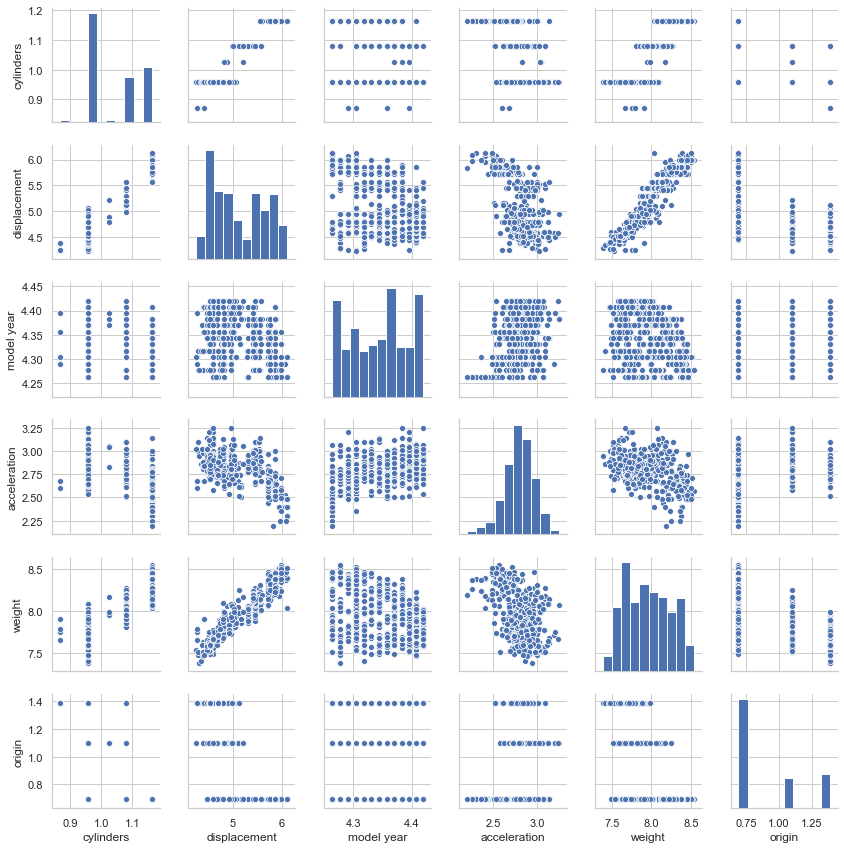

In [22]:
sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df,vars=['cylinders','displacement','model year','acceleration','weight','origin'] ,height=2); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

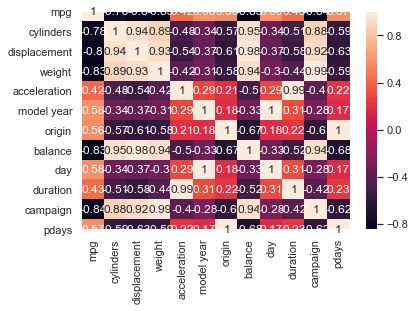

In [20]:
corr=df.corr()
sns.heatmap(corr, annot=True)

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['car name']= label_encoder.fit_transform(df['car name']) 
df['horsepower']= label_encoder.fit_transform(df['horsepower'])  

## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [36]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([ 7,  9, 11], dtype=int64), array([5, 5, 5], dtype=int64))


### E .Train_test Split

In [37]:
y=df['mpg']
x=df.drop(['mpg'],axis=1)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 5. Building Models

# Model1 : KNN

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
clf.best_params_

{'n_neighbors': 11}

In [33]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=11)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.5610657312004199


# Model 3 : Linear regression 

In [39]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.7941495434240495


# Model 4 : SVM

In [40]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.7043374704972749


In [41]:
model.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [42]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVR(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[-0.0627775021884565, -0.0434002877880718, 0.2249938742008284, 0.38565955723049994, 0.7147964486359919]


In [43]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

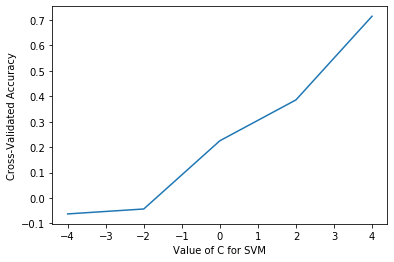

In [44]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [45]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

clf = SVR(C=1000,gamma=0.0001,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.6573869803457149


# Model 5 : Decision Tree

In [36]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.9492020983083314


In [37]:
model.best_params_

{'max_depth': 5}

In [38]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.5181269574305107, 0.6479288654310666, 0.6479288654310666, 0.6479288654310664, 0.6479288654310665]


Text(0, 0.5, 'Cross-Validated Accuracy')

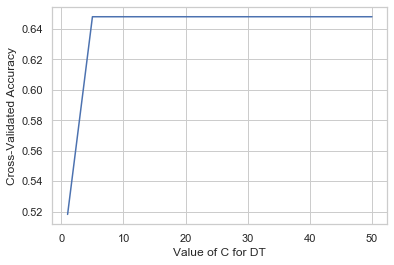

In [39]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [40]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=5,min_samples_split=2)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.8317201887726523


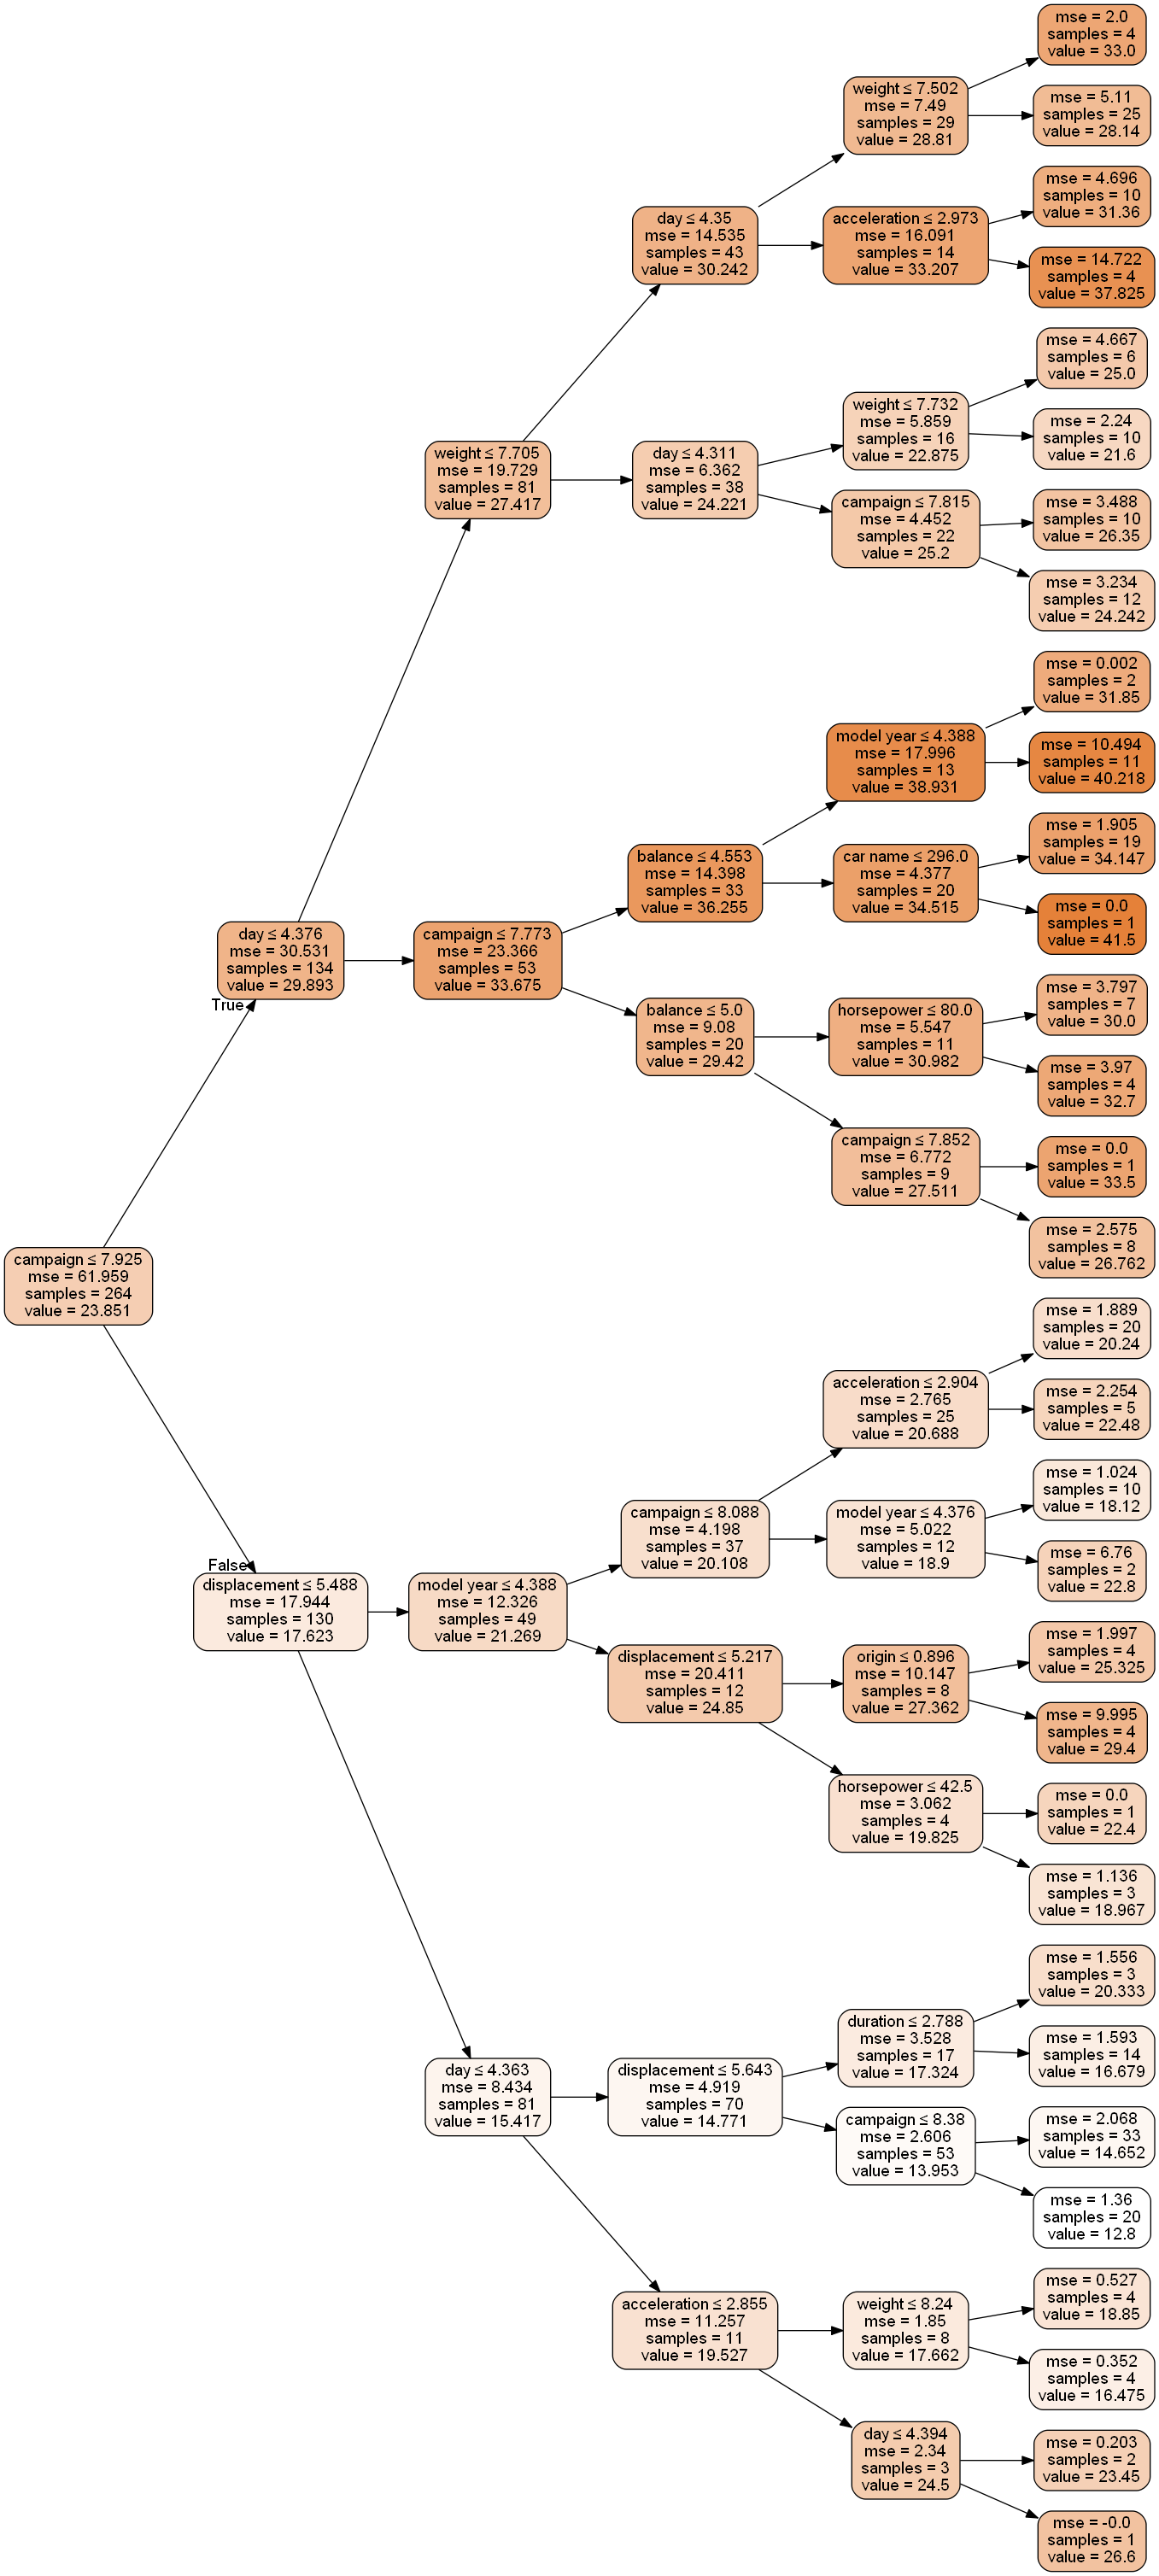

In [41]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9842488645089282


In [43]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.8230565745100206


# Boosting

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.848132447462436


In [45]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=50)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.8489031326412426


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [46]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[01:35:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8443686141364325


# 6.Model Comparison

In [46]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.5610' ])
table.add_row(["Linear Regression" ,'0.7941' ])
table.add_row(["SVM", '0.6573' ])
table.add_row(["Decision Tree",'0.8317' ])
table.add_row(["RandomForest",'0.8230' ])
table.add_row(["GBDT" ,'0.8489' ])
table.add_row(["Xgboost",'0.8443' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.5610  |
| Linear Regression |  0.7941  |
|        SVM        |  0.6573  |
|   Decision Tree   |  0.8317  |
|    RandomForest   |  0.8230  |
|        GBDT       |  0.8489  |
|      Xgboost      |  0.8443  |
+-------------------+----------+


# 7.Creating Submission File

In [ ]:
best_model=GBDT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)